In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from random import random

In [35]:
import randomized_ir

from utils import generate_poissonian_ns

In [36]:
matplotlib.rcParams.update({'font.size': 12})

In [37]:
from importlib import reload
reload(randomized_ir)


<module 'randomized_ir' from '/home/njvh/Documents/Science/sphere/detector-model/randomized-impulse-response/randomized_ir.py'>

## IR

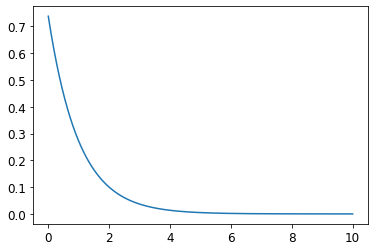

In [57]:
gamma = 1

pts_per_bin = 100
n_bins = 10

ir_x = np.linspace(0, n_bins, n_bins * pts_per_bin)

# exp-decay
ir_y = np.exp(- gamma * ir_x)

# step
# step_witdh = 2
# ir_y = (ir_x < step_witdh).astype('float')

rir = randomized_ir.RandomizedIr(ir_x, ir_y, factor=lambda: 0.5 + 0.5*random())

rir.plot_realization()

In [58]:
rir.nbins

10

# Convoluted signal

In [59]:
N_bins = 50
n_mean = 15

delta_ns = generate_poissonian_ns(n_mean, N_bins)

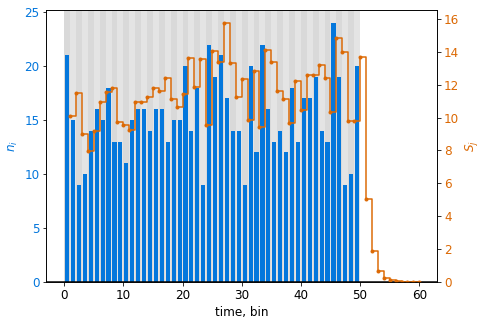

In [66]:
fig, ax1 = plt.subplots(figsize=(7, 5))
photon_color = '#0477DC'
photon_color_dimmed = '#3774A9'
signal_color = '#DC6904'

# bin stripes
ax1.axhline(0, color='black')
for i in range(N_bins):
    ax1.axvspan(i, i+1, facecolor=([0, 0, 0] if i % 2 == 0 else [0.3, 0.3, 0.3]), alpha=0.15 , edgecolor=None)

# counts
ax1.bar(np.arange(N_bins) + 0.5, delta_ns, width=0.7, color=photon_color)
# ax1.axhline(n_mean, color=photon_color_dimmed)

ax1.set_xlabel('time, bin')
ax1.set_ylabel('$n_i$', color=photon_color)
ax1.tick_params(axis='y', labelcolor=photon_color)

ax2 = ax1.twinx()

signal_x, signal_y = rir.convolve_with_deltas(delta_ns)
# for non trivial inbin time distribution:
# signal_x, signal_y = rir.convolve_with_deltas(delta_ns, inbin_invcdf=lambda x: x**(1/10), debug_inbin_times=True)
ax2.step(signal_x, signal_y, '.-', where='post', color=signal_color)

ax2.set_ylabel('$S_j$', color=signal_color)
ax2.tick_params(axis='y', labelcolor=signal_color)

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# plt.show()
plt.savefig('./doc/pic/problem-setup-example.pdf')

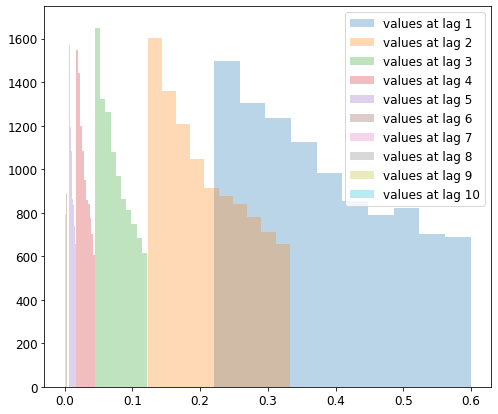

In [67]:
stats = randomized_ir.RandomizedIrStats(rir, samplesize=10000)

stats.plot_samples()

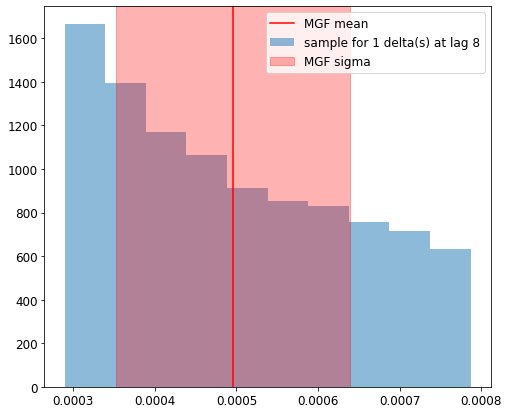

In [78]:
stats.plot_moments(n=1, lag=8)